### Step 1: Generating sample data
Create the two samples with a random normal generator  50 each

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# set the seed
np.random.seed(22) 

# Set sample size, mean, and standard deviation for each restaurant
n = 50
mu_x = 179
sigma_x = 50
mu_y = 185
sigma_y = 75 

# Create variables for the drive times of each restaurant
drive_times_x = np.random.normal(mu_x, sigma_x, n)
drive_times_y = np.random.normal(mu_y, sigma_y, n)

# Create for loop to select the integer values for each drive time of each restaurant
for k in range(n):
    drive_times_x[k] = abs(int(drive_times_x[k]))
    drive_times_y[k] = abs(int(drive_times_y[k]))

# Create a dataframe with the drive times for each restaurant
drive_times_x_df = pd.DataFrame(drive_times_x, columns=['drive_times_x'])
drive_times_y_df = pd.DataFrame(drive_times_y, columns=['drive_times_y'])

#Print the Head of the Dataframes
print("drive_times_x dataframe\n")
print(drive_times_x_df.head())
print(" ")
print("drive_times_y dataframe\n")
print(drive_times_y_df.head())

drive_times_x dataframe

   drive_times_x
0          174.0
1          105.0
2          233.0
3          167.0
4          154.0
 
drive_times_y dataframe

   drive_times_y
0          240.0
1          225.0
2          130.0
3          226.0
4          217.0


### Step 2: Calculate Dexcriptive Statistics

In [32]:
# Descriptive Statistics for Restaurant X
statistics_x = drive_times_x_df['drive_times_x'].describe()
print('Summary Statistics for Restaurant X')
print(statistics_x)
print(" ")  

# Descriptive Statistics for Restaurant Y
statistics_y = drive_times_y_df['drive_times_y'].describe()
print('Summary Statistics for Restaurant Y')
print(statistics_y)

Summary Statistics for Restaurant X
count     50.000000
mean     174.640000
std       52.084218
min       54.000000
25%      136.500000
50%      173.000000
75%      209.500000
max      303.000000
Name: drive_times_x, dtype: float64
 
Summary Statistics for Restaurant Y
count     50.000000
mean     183.180000
std       68.350743
min       22.000000
25%      145.000000
50%      191.000000
75%      226.000000
max      373.000000
Name: drive_times_y, dtype: float64


##### Generate additional information from the Summary Statistics to gather any additional insights. 

### Step 3: Create graphic representation for each data set. 

In [33]:
# Calculate the Range for Restaurant X
range_x = drive_times_x_df['drive_times_x'].max() - drive_times_x_df['drive_times_x'].min()
print("Range for Restaurant X")
print(range_x)
print(" ")

# Calculate the Range for Restaurant Y
range_y = drive_times_y_df['drive_times_y'].max() - drive_times_y_df['drive_times_y'].min()
print("Range for Restaurant Y")
print(range_y)
print(" ")

# Calculate the absolute difference between range of Restaurant X and Restaurant Y
range_diff = abs(range_x - range_y)
print("Absolute difference between range of Restaurant X and Restaurant Y")
print(range_diff)
print(" ")

# Calculate the Interquartile Range for Restaurant X
iqr_x = statistics_x['75%'] - statistics_x['25%']
print("Interquartile Range for Restaurant X")
print(iqr_x)
print(" ")

# Calculate the Interquartile Range for Restaurant Y
iqr_y = statistics_y['75%'] - statistics_y['25%']
print("Interquartile Range for Restaurant Y")
print(iqr_y)
print(" ")

# Calculate the absolute difference between Interquartile Range of Restaurant X and Restaurant Y
iqr_diff = abs(iqr_x - iqr_y)
print("Absolute difference between Interquartile Range of Restaurant X and Restaurant Y")
print(iqr_diff)



Range for Restaurant X
249.0
 
Range for Restaurant Y
351.0
 
Absolute difference between range of Restaurant X and Restaurant Y
102.0
 
Interquartile Range for Restaurant X
73.0
 
Interquartile Range for Restaurant Y
81.0
 
Absolute difference between Interquartile Range of Restaurant X and Restaurant Y
8.0


<Axes: >

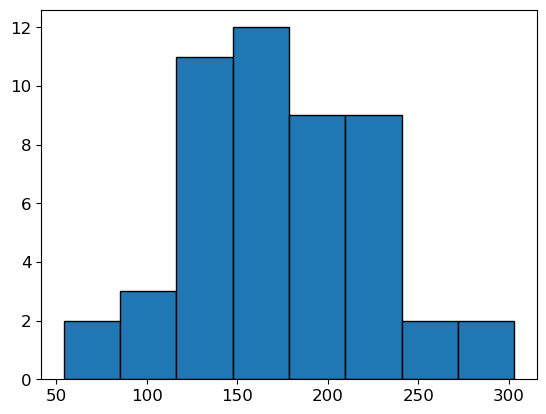

In [34]:
# Create a pandas histogram for restaurant x
# I added the edgecolor='black' and grid=False to make the histogram easier to read
# I used the square root rule to determine the number of bins
drive_times_x_df['drive_times_x'].hist(bins=8, xlabelsize=12, ylabelsize=12, edgecolor='black', grid=False)

<Axes: >

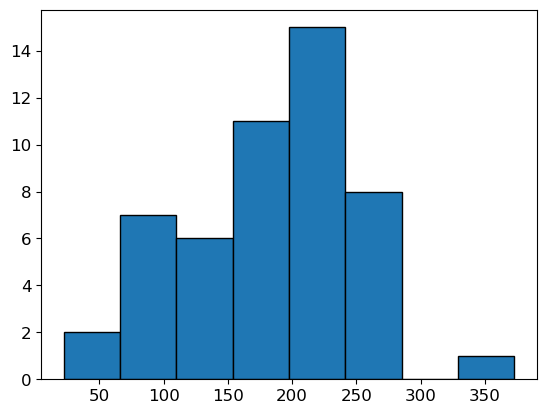

In [35]:
# Create a pandas histogram for restaurant y
# I added the edgecolor='black' and grid=False to make the histogram easier to read
# I used the square root rule to determine the number of bins
drive_times_y_df['drive_times_y'].hist(bins=8, grid=False, xlabelsize=12, ylabelsize=12, edgecolor='black')

In [50]:
# Identify the outliers for Restaurant Y
# I used the 1.5*IQR rule to identify the outliers
# I used the .loc function to identify the outliers
outliers_y = drive_times_y_df.loc[(drive_times_y_df['drive_times_y'] < (statistics_y['25%'] - 1.5*iqr_y)) | (drive_times_y_df['drive_times_y'] > (statistics_y['75%'] + 1.5*iqr_y))]
print("Outliers for Restaurant Y")
print(outliers_y)
 

Outliers for Restaurant Y
    drive_times_y
13          373.0
41           22.0


#### Combined graph histogram for both restuarant x and y

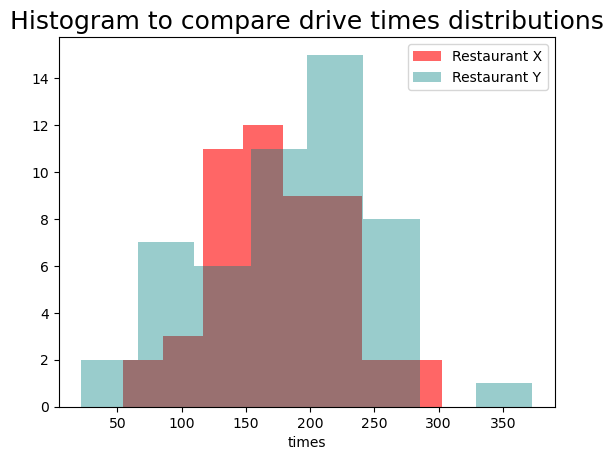

In [36]:
# Create a combined histogram for restaurant x and y using matplotlib
plt.subplots()
plt.hist(drive_times_x_df['drive_times_x'], bins=8, alpha=0.6, color="red",label='Restaurant X')
plt.hist(drive_times_y_df['drive_times_y'], bins=8, alpha=0.4, color="teal", label='Restaurant Y')
plt.title('Histogram to compare drive times distributions', fontsize=18)
plt.xlabel('times')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

c:\Users\renej\.conda\envs\sta_2041\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


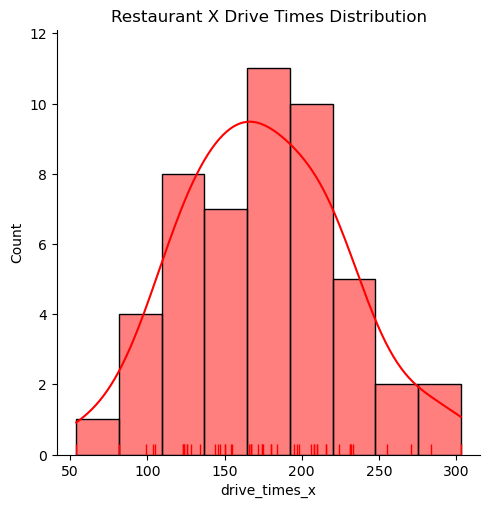

In [37]:
# Create a histogram with kde and data point markers for restaurant x
sns.displot(drive_times_x_df['drive_times_x'], bins=9, kde=True, rug=True, color="red")
plt.title("Restaurant X Drive Times Distribution")
plt.show()

c:\Users\renej\.conda\envs\sta_2041\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


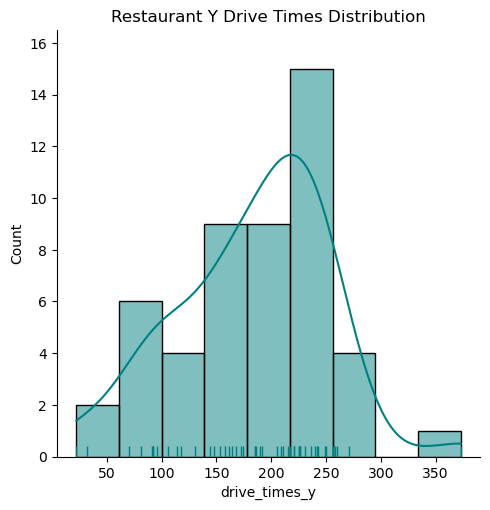

In [38]:
# Create a histogram with kde and data point markers for restaurant y
sns.displot(drive_times_y_df['drive_times_y'], bins=9, kde=True, rug=True, color="teal")
plt.title("Restaurant Y Drive Times Distribution")
plt.show()

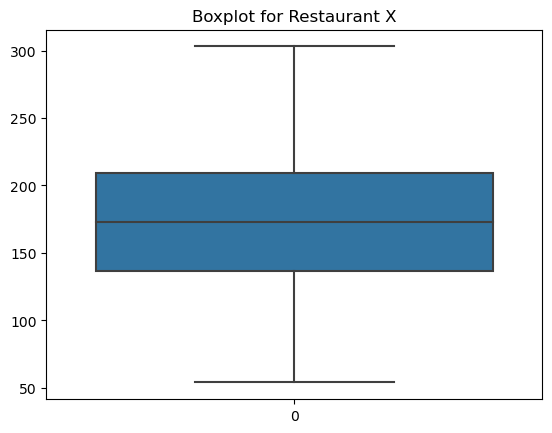

In [39]:
# Create a boxplot for restaurant x
sns.boxplot(drive_times_x_df['drive_times_x']).set_title("Boxplot for Restaurant X")
plt.show()

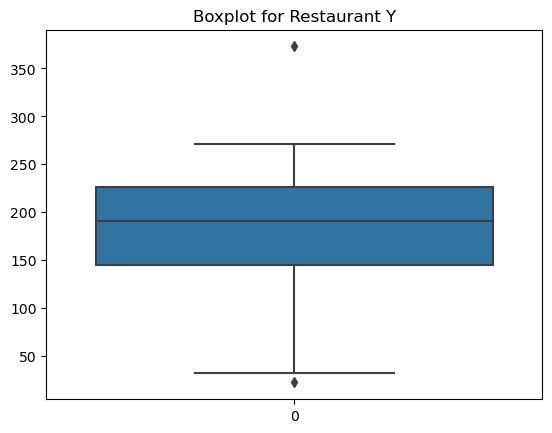

In [40]:
# Create a boxplot for restaurant y
sns.boxplot(drive_times_y_df['drive_times_y']).set_title("Boxplot for Restaurant Y")
plt.show()

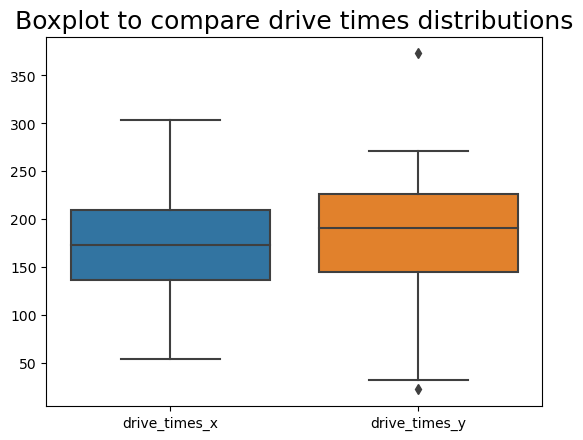

In [41]:
# Create a boxplot for restaurant x and y side by side 
both_drive_times_df = pd.concat((drive_times_x_df, drive_times_y_df))
plt.title("Boxplot to compare drive times distributions", fontsize=18)
sns.boxplot(data=both_drive_times_df)
plt.show()

### Step 4a: Constructing a 99% confidence intervals for Restaurant X

In [42]:
# Construct a 99% confidence interval for the mean drive time for restaurant x

# Calculate the sample mean
mean_x = drive_times_x_df['drive_times_x'].mean()
print("mean_x =", mean_x)
# Calculate the sample standard deviation
st_dev_x = drive_times_x_df['drive_times_x'].std()
print("st_dev_x =", st_dev_x)
# Calculate the standard error
stderr_x = st_dev_x/math.sqrt(len(drive_times_x_df['drive_times_x']))
print("stderr_x =", stderr_x)
print(" ")

# METHOD 1
conf_int_99 = st.norm.interval(0.99, mean_x, stderr_x)
print("METHOD 1\n")
print("99% confidence interval (unrounded) =", conf_int_99)
print("99% confidence interval (rounded) = (", round(conf_int_99[0], 2), ",", round(conf_int_99[1], 2), ")")
print(" ")

# METHOD 2 - construct a 99% confidence interval using Scipy.stats and the t-distribution
print("METHOD 2")
st.t.interval(0.99, df=len(drive_times_x)-1,loc=np.mean(drive_times_x), scale = st.sem(drive_times_x))

mean_x = 174.64
st_dev_x = 52.08421751630444
stderr_x = 7.365820679714806
 
METHOD 1

99% confidence interval (unrounded) = (155.6669032485041, 193.61309675149587)
99% confidence interval (rounded) = ( 155.67 , 193.61 )
 
METHOD 2


(154.8999543319822, 194.38004566801777)

In [43]:
# METHOD 3 - construct a 99% confidence interval using Scipy.stats and the normal distribution
print("METHOD 3")
st.norm.interval(0.99, loc=np.mean(drive_times_x), scale = st.sem(drive_times_x))

METHOD 3


(155.6669032485041, 193.61309675149587)

### Step 4b: Constructing a 90% confidence intervals for Restaurant X and Restaurant y

In [44]:
# Construct a 90% confidence interval for the mean drive time for restaurant x
print("90% confidence interval for the mean drive times for restaurant x")
ci_90_x = st.norm.interval(0.90, loc=np.mean(drive_times_x), scale = st.sem(drive_times_x))
print(ci_90_x)

90% confidence interval for the mean drive times for restaurant x
(162.52430313949694, 186.75569686050304)


In [45]:
# Construct a 90% confidence interval for the mean drive time for restaurant y
print("90% confidence interval for the mean drive times for restaurant y")
ci_90_y = st.norm.interval(0.90, loc=np.mean(drive_times_y), scale = st.sem(drive_times_y))
print(ci_90_y)

90% confidence interval for the mean drive times for restaurant y
(167.28042575240045, 199.07957424759957)


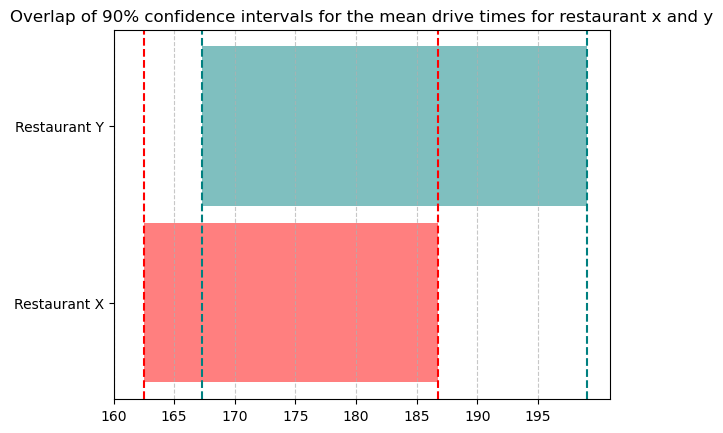

In [46]:
# Create a horizontal bar chart to show the overlap of the 90% confidence intervals for the mean drive times for restaurant x and y

# Create variables for the lower and upper bounds of the confidence intervals
lower_x = ci_90_x[0]
upper_x = ci_90_x[1]
lower_y = ci_90_y[0]    
upper_y = ci_90_y[1]

# Create a horizontal bar plot
plt.barh(y=[1,2], width=[upper_x-lower_x, upper_y-lower_y], left=[lower_x, lower_y], height=0.9, align='center', color=['red', 'teal'], alpha=0.5)
plt.yticks([1,2], ['Restaurant X', 'Restaurant Y'])
plt.xticks(np.arange(160, 200, 5))
plt.title("Overlap of 90% confidence intervals for the mean drive times for restaurant x and y")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(x=lower_x, color='red', linestyle='--')
plt.axvline(x=upper_x, color='red', linestyle='--')
plt.axvline(x=lower_y, color='teal', linestyle='--')
plt.axvline(x=upper_y, color='teal', linestyle='--')
plt.show()

### Step 5: Construct 99% confidence intervals for both Restaruant x and Restaruant y using METHOD 3

In [47]:
# Construct a 99% confidence interval for the mean drive times for restaurant x
print("99% confidence interval for the mean drive times for restaurant x")
ci_99_x = st.norm.interval(0.99, loc=np.mean(drive_times_x), scale = st.sem(drive_times_x))
print(ci_99_x)

99% confidence interval for the mean drive times for restaurant x
(155.6669032485041, 193.61309675149587)


In [48]:
# Construct a 99% confidence interval for the mean drive times for restaurant y
print("99% confidence interval for the mean drive times for restaurant y")
ci_99_y = st.norm.interval(0.99, loc=np.mean(drive_times_y), scale = st.sem(drive_times_y))
print(ci_99_y)

99% confidence interval for the mean drive times for restaurant y
(158.2813776606843, 208.0786223393157)


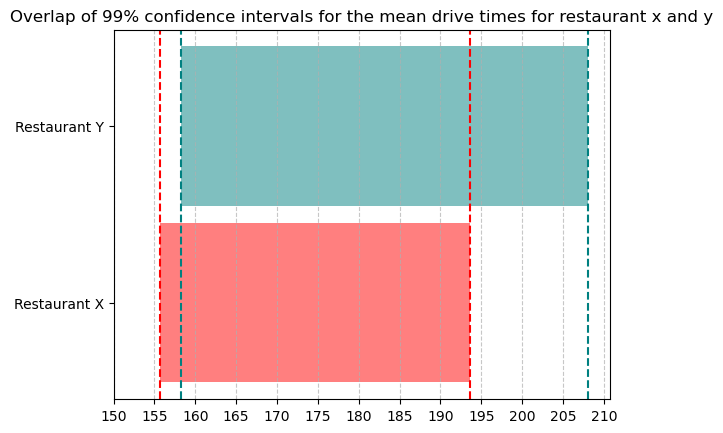

In [49]:
# Create a horizontal bar chart to show the overlap of the 99% confidence intervals for the mean drive times for restaurant x and y

# Create variables for the lower and upper bounds of the confidence intervals
lower1 = ci_99_x[0]
upper1 = ci_99_x[1]
lower2 = ci_99_y[0]
upper2 = ci_99_y[1]

# Create a horizontal bar plot
plt.barh(y=[1, 2], width=[upper1 - lower1, upper2 - lower2], left=[lower1, lower2], height=0.9, align='center', color=['red', 'teal'], alpha=0.5)
plt.yticks([1, 2], ['Restaurant X', 'Restaurant Y'])
plt.xticks(np.arange(150, 215, 5))
plt.title('Overlap of 99% confidence intervals for the mean drive times for restaurant x and y')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(x=lower1, color='red', linestyle='--')
plt.axvline(x=upper1, color='red', linestyle='--')
plt.axvline(x=lower2, color='teal', linestyle='--')
plt.axvline(x=upper2, color='teal', linestyle='--')
plt.show()